# Sesión 6: Redes Neuronales (MLP) - Teoría
**Objetivo:** Comprender la arquitectura de perceptrones multicapa, funciones de activación y backpropagation

---

## 🧠 ¿Qué son las Redes Neuronales (MLP)?

Un **Perceptrón Multicapa (MLP)** es una red neuronal artificial compuesta por múltiples capas de neuronas interconectadas que puede aprender patrones complejos y no lineales en los datos.

### Inspiración Biológica
Las redes neuronales artificiales se inspiran en el funcionamiento del cerebro humano:
- **Neuronas**: Unidades de procesamiento básicas
- **Sinapsis**: Conexiones ponderadas entre neuronas
- **Activación**: Respuesta de la neurona ante estímulos

### Idea Central
> **"Una red de neuronas simples puede aprender funciones complejas mediante la combinación de transformaciones no lineales"**

---

## 🏗️ Arquitectura del Perceptrón Multicapa

### Estructura Básica

```
Entrada → Capa Oculta 1 → Capa Oculta 2 → ... → Capa de Salida
   x₁        h₁₁           h₂₁                    ŷ₁
   x₂        h₁₂           h₂₂                    ŷ₂
   x₃        h₁₃           h₂₃                    ...
   ...       ...           ...                    ŷₙ
```

### Componentes Principales:

#### 1. **Capa de Entrada (Input Layer)**
- Recibe las características del dataset
- No realiza cálculos, solo distribuye datos
- Número de neuronas = número de features

#### 2. **Capas Ocultas (Hidden Layers)**
- Realizan transformaciones de los datos
- Extraen características de nivel superior
- Pueden ser múltiples capas
- Número de neuronas es configurable

#### 3. **Capa de Salida (Output Layer)**
- Produce la predicción final
- **Clasificación binaria**: 1 neurona
- **Clasificación multiclase**: k neuronas (k clases)
- **Regresión**: 1 neurona (valor continuo)

### Terminología Clave:
- **Pesos (w)**: Fuerza de conexión entre neuronas
- **Sesgo (b)**: Término independiente por neurona
- **Activación**: Salida de una neurona tras aplicar función de activación

---

## ⚡ Funcionamiento de una Neurona

### Cálculo en una Neurona:

```
z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b
y = f(z)
```

Donde:
- **z**: Suma ponderada (linear combination)
- **f()**: Función de activación
- **y**: Salida de la neurona

### Proceso paso a paso:
1. **Entrada**: Recibe señales de neuronas anteriores
2. **Suma ponderada**: Calcula z = Σ(wᵢxᵢ) + b
3. **Activación**: Aplica función f(z)
4. **Salida**: Envía resultado a siguientes capas

---

## 🎛️ Funciones de Activación

Las funciones de activación introducen **no linealidad** en la red, permitiendo aprender patrones complejos.

### 1. **Función Sigmoide**
```
σ(z) = 1/(1 + e^(-z))
```
- **Rango**: (0, 1)
- **Uso**: Clasificación binaria (capa de salida)
- **Ventaja**: Salida interpretable como probabilidad
- **Desventaja**: Saturación (gradientes muy pequeños)

### 2. **Función Tanh**
```
tanh(z) = (e^z - e^(-z))/(e^z + e^(-z))
```
- **Rango**: (-1, 1)
- **Uso**: Capas ocultas (mejor que sigmoide)
- **Ventaja**: Centrada en cero
- **Desventaja**: También sufre saturación

### 3. **Función ReLU (Rectified Linear Unit)**
```
ReLU(z) = max(0, z)
```
- **Rango**: [0, ∞)
- **Uso**: Capas ocultas (muy popular)
- **Ventajas**: 
  - Computacionalmente eficiente
  - No saturación en región positiva
  - Acelera convergencia
- **Desventaja**: "Muerte" de neuronas (z < 0)

### 4. **Función Leaky ReLU**
```
LeakyReLU(z) = max(αz, z)  donde α ≈ 0.01
```
- **Ventaja**: Evita muerte de neuronas
- **Uso**: Alternativa a ReLU

### 5. **Función Softmax** (Solo capa de salida)
```
softmax(zᵢ) = e^(zᵢ)/Σⱼe^(zⱼ)
```
- **Uso**: Clasificación multiclase
- **Ventaja**: Suma de salidas = 1 (distribución de probabilidad)

### Guía de Selección:
```
Capas Ocultas:    ReLU (primera opción)
Clasificación binaria:  Sigmoide
Clasificación multiclase: Softmax
Regresión:       Lineal (sin activación)
```

---

## 🔄 Backpropagation (Conceptual)

### ¿Qué es Backpropagation?

Es el algoritmo que permite a la red neuronal **aprender** ajustando los pesos basándose en los errores de predicción.

### Proceso de Entrenamiento:

#### 1. **Forward Pass (Propagación hacia adelante)**
```
Entrada → Capa 1 → Capa 2 → ... → Salida → Error
```
- Los datos fluyen desde entrada hasta salida
- Se calcula la predicción
- Se mide el error con la función de pérdida

#### 2. **Backward Pass (Retropropagación)**
```
Error ← Capa n ← Capa n-1 ← ... ← Capa 1
```
- El error se propaga hacia atrás
- Se calculan gradientes para cada peso
- Se actualizan pesos para minimizar error

### Algoritmo Simplificado:

```python
for epoch in range(num_epochs):
    for batch in training_data:
        # Forward pass
        prediction = network.forward(batch.input)
        loss = loss_function(prediction, batch.target)
        
        # Backward pass
        gradients = network.backward(loss)
        
        # Update weights
        optimizer.update(weights, gradients)
```

### Funciones de Pérdida:

#### **Clasificación:**
- **Binary Cross-Entropy**: `-[y*log(ŷ) + (1-y)*log(1-ŷ)]`
- **Categorical Cross-Entropy**: `-Σyᵢ*log(ŷᵢ)`

#### **Regresión:**
- **Mean Squared Error**: `(y - ŷ)²`
- **Mean Absolute Error**: `|y - ŷ|`

---

## 🎯 Hiperparámetros Importantes

### 1. **Arquitectura de la Red**

#### **Número de Capas Ocultas:**
- **1 capa**: Problemas linealmente separables
- **2 capas**: Mayoría de problemas prácticos
- **3+ capas**: Problemas muy complejos (deep learning)

#### **Número de Neuronas por Capa:**
- **Regla empírica**: Entre tamaño entrada y salida
- **Muy pocas**: Underfitting
- **Muchas**: Overfitting, lento

### 2. **Parámetros de Entrenamiento**

#### **Learning Rate (Tasa de Aprendizaje)**
- **Muy alto**: Inestabilidad, oscilaciones
- **Muy bajo**: Convergencia lenta
- **Típico**: 0.001 - 0.01

#### **Número de Épocas**
- **Pocas**: Underfitting
- **Muchas**: Overfitting
- **Estrategia**: Early stopping

#### **Batch Size**
- **Pequeño**: Más ruido, más actualizaciones
- **Grande**: Menos ruido, menos actualizaciones
- **Típico**: 32, 64, 128

### 3. **Regularización**

#### **Alpha (Regularización L2)**
- Penaliza pesos grandes
- Previene overfitting
- **Valor típico**: 0.0001 - 0.01

#### **Dropout** (No en sklearn básico)
- Desactiva neuronas aleatoriamente
- Reduce dependencias específicas

---

## ✅ Ventajas de las Redes Neuronales

1. **Aproximador universal**: Puede aprender cualquier función continua
2. **No linealidad**: Maneja patrones complejos naturalmente
3. **Flexibilidad**: Adaptable a muchos tipos de problemas
4. **Robustez**: Tolerante a ruido en los datos
5. **Escalabilidad**: Mejora con más datos
6. **Versatilidad**: Clasificación, regresión, clustering

---

## ❌ Limitaciones de las Redes Neuronales

1. **Caja negra**: Difícil interpretabilidad
2. **Datos requeridos**: Necesita datasets grandes
3. **Tiempo de entrenamiento**: Computacionalmente costoso
4. **Hiperparámetros**: Muchos parámetros que ajustar
5. **Overfitting**: Propensas al sobreajuste
6. **Inicialización**: Sensible a pesos iniciales

---

## 🎛️ Proceso de Ajuste de Hiperparámetros

### Estrategia Recomendada:

#### 1. **Baseline Simple**
```python
MLPClassifier(
    hidden_layer_sizes=(100,),  # 1 capa, 100 neuronas
    activation='relu',           # ReLU para capas ocultas
    solver='adam',              # Optimizador adaptativo
    random_state=42
)
```

#### 2. **Ajuste Arquitectura**
- Probar diferentes tamaños de capa: (50,), (100,), (200,)
- Probar múltiples capas: (100, 50), (100, 100)

#### 3. **Ajuste Learning Rate**
- Probar: 0.001, 0.01, 0.1
- Usar learning_rate_init parameter

#### 4. **Ajuste Regularización**
- Probar alpha: 0.0001, 0.001, 0.01

### Grid Search Ejemplo:
```python
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}
```

---

## 🔍 Diagnóstico de Problemas

### **Underfitting (Subajuste)**
**Síntomas:**
- Baja precisión en entrenamiento y validación
- Pérdida no disminuye

**Soluciones:**
- Aumentar número de neuronas/capas
- Reducir regularización (alpha)
- Aumentar épocas de entrenamiento
- Reducir learning rate

### **Overfitting (Sobreajuste)**
**Síntomas:**
- Alta precisión en entrenamiento, baja en validación
- Gap creciente entre train/validation loss

**Soluciones:**
- Aumentar regularización (alpha)
- Reducir arquitectura de red
- Early stopping
- Más datos de entrenamiento

### **Convergencia Lenta**
**Síntomas:**
- Pérdida disminuye muy lentamente
- Muchas épocas sin mejora

**Soluciones:**
- Aumentar learning rate
- Cambiar optimizador (adam, lbfgs)
- Normalizar datos
- Cambiar función de activación

---

## 🏥 Ejemplo Conceptual: Diagnóstico Médico

### Problema: Clasificar tumores malignos/benignos

```
Entrada (30 features):
- Radio medio, textura, perímetro, área...

Arquitectura sugerida:
Entrada (30) → Oculta (64) → Oculta (32) → Salida (1)

Configuración:
- Activación oculta: ReLU
- Activación salida: Sigmoide
- Función pérdida: Binary cross-entropy
- Optimizador: Adam
```

### ¿Por qué funciona?
1. **Capa 1**: Detecta patrones básicos (bordes, texturas)
2. **Capa 2**: Combina patrones en características complejas
3. **Salida**: Integra toda la información para decisión final

---

## 📊 Comparación: MLP vs KNN vs SVM

| Aspecto | MLP | KNN | SVM |
|---------|-----|-----|-----|
| **Complejidad modelo** | Alta | Baja | Media |
| **Tiempo entrenamiento** | Alto | Ninguno | Medio |
| **Tiempo predicción** | Rápido | Lento | Rápido |
| **Interpretabilidad** | Muy baja | Alta | Media |
| **Manejo no linealidad** | Excelente | Bueno | Bueno |
| **Datos requeridos** | Muchos | Medio | Pocos |
| **Ajuste hiperparámetros** | Complejo | Simple | Medio |

---

## 🎯 Cuándo Usar Redes Neuronales

### ✅ Ideal para:
- **Datasets grandes** (>1000 muestras)
- **Patrones muy complejos** y no lineales
- **Problemas de alta dimensión**
- **Cuando la precisión es prioritaria**
- **Datos con ruido**
- **Problemas donde interpretabilidad no es crítica**

### ❌ Considerar alternativas cuando:
- **Datasets pequeños** (<500 muestras)
- **Interpretabilidad crítica**
- **Recursos computacionales limitados**
- **Necesidad de resultados rápidos**
- **Problemas linealmente separables**

---

## 🔜 Próximo Paso

En la práctica implementaremos MLP con el dataset **API Calls Malware Detection** para:
- Diseñar arquitectura apropiada
- Optimizar hiperparámetros sistemáticamente
- Analizar curvas de aprendizaje
- Comparar con KNN y SVM
- Interpretar resultados en contexto de ciberseguridad

# Preparación del Entorno y Datos
## Importar Librerías

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")

# GENERACIÓN DE DATASET SIMULADO: API CALLS MALWARE DETECTION

In [20]:
# Crear dataset sintético que simule detección de malware
# Features representan frecuencia de diferentes API calls
np.random.seed(42)

# Generar dataset complejo para redes neuronales
X, y = make_classification(
    n_samples=2000,           # 2000 muestras de software
    n_features=50,           # 50 tipos diferentes de API calls
    n_informative=40,        # 40 features realmente importantes
    n_redundant=5,           # 5 features redundantes
    n_clusters_per_class=3,  # 3 clusters por clase (diferentes familias malware)
    flip_y=0.05,             # 5% de ruido en etiquetas
    random_state=42
)

# Crear nombres de API calls simulados
api_calls = [
    'CreateFile', 'WriteFile', 'ReadFile', 'DeleteFile', 'RegOpenKey',
    'RegSetValue', 'RegDeleteKey', 'CreateProcess', 'TerminateProcess', 'OpenProcess',
    'VirtualAlloc', 'VirtualProtect', 'LoadLibrary', 'GetProcAddress', 'Socket',
    'Connect', 'Send', 'Recv', 'HttpOpen', 'HttpConnect',
    'CryptCreateHash', 'CryptHashData', 'CreateMutex', 'WaitForSingleObject', 'Sleep',
    'GetSystemTime', 'GetComputerName', 'GetUserName', 'IsDebuggerPresent', 'CheckRemoteDebugger',
    'NtQueryInfo', 'NtCreateFile', 'LdrLoadDll', 'NtAllocateVirtualMemory', 'NtProtectVirtualMemory',
    'NtCreateProcess', 'NtTerminateProcess', 'NtOpenProcess', 'NtCreateKey', 'NtSetValueKey',
    'NtDeleteKey', 'NtCreateMutant', 'NtWaitForSingleObject', 'RtlCreateHeap', 'RtlAllocateHeap',
    'InternetOpen', 'InternetConnect', 'InternetReadFile', 'URLDownloadToFile', 'WinExec'
]

# Crear DataFrame
df = pd.DataFrame(X, columns=api_calls)
df['is_malware'] = y

print(f"✅ Dataset generado exitosamente!")
print(f"📊 Dimensiones: {df.shape}")
print(f"🎯 Clases: Benigno (0): {sum(y == 0)}, Malware (1): {sum(y == 1)}")
print(f"📈 Distribución: {100*sum(y == 1)/len(y):.1f}% malware")

# Mostrar estadísticas de algunos API calls importantes
print(f"\n📊 Estadísticas de API calls clave:")
key_apis = ['CreateFile', 'RegSetValue', 'CreateProcess', 'VirtualAlloc', 'Socket']
for api in key_apis:
    benign_mean = df[df['is_malware'] == 0][api].mean()
    malware_mean = df[df['is_malware'] == 1][api].mean()
    print(f"   {api:<15}: Benigno={benign_mean:.2f}, Malware={malware_mean:.2f}")

✅ Dataset generado exitosamente!
📊 Dimensiones: (2000, 51)
🎯 Clases: Benigno (0): 985, Malware (1): 1015
📈 Distribución: 50.8% malware

📊 Estadísticas de API calls clave:
   CreateFile     : Benigno=-0.01, Malware=-0.02
   RegSetValue    : Benigno=-3.18, Malware=-0.53
   CreateProcess  : Benigno=-0.04, Malware=-0.02
   VirtualAlloc   : Benigno=-0.99, Malware=0.15
   Socket         : Benigno=0.44, Malware=-0.25


# PREPARACIÓN Y ANÁLISIS EXPLORATORIO

✅ División de datos:
   📊 Entrenamiento: 1600 muestras
   📊 Prueba: 400 muestras
   🔧 Datos escalados para MLP

🎯 Top 10 API calls más correlacionados con malware:
    1. Connect             : 0.282
    2. InternetReadFile    : 0.237
    3. NtDeleteKey         : 0.182
    4. NtCreateProcess     : 0.178
    5. InternetConnect     : 0.175
    6. NtOpenProcess       : 0.154
    7. VirtualAlloc        : 0.152
    8. DeleteFile          : 0.136
    9. RtlAllocateHeap     : 0.133
   10. InternetOpen        : 0.125


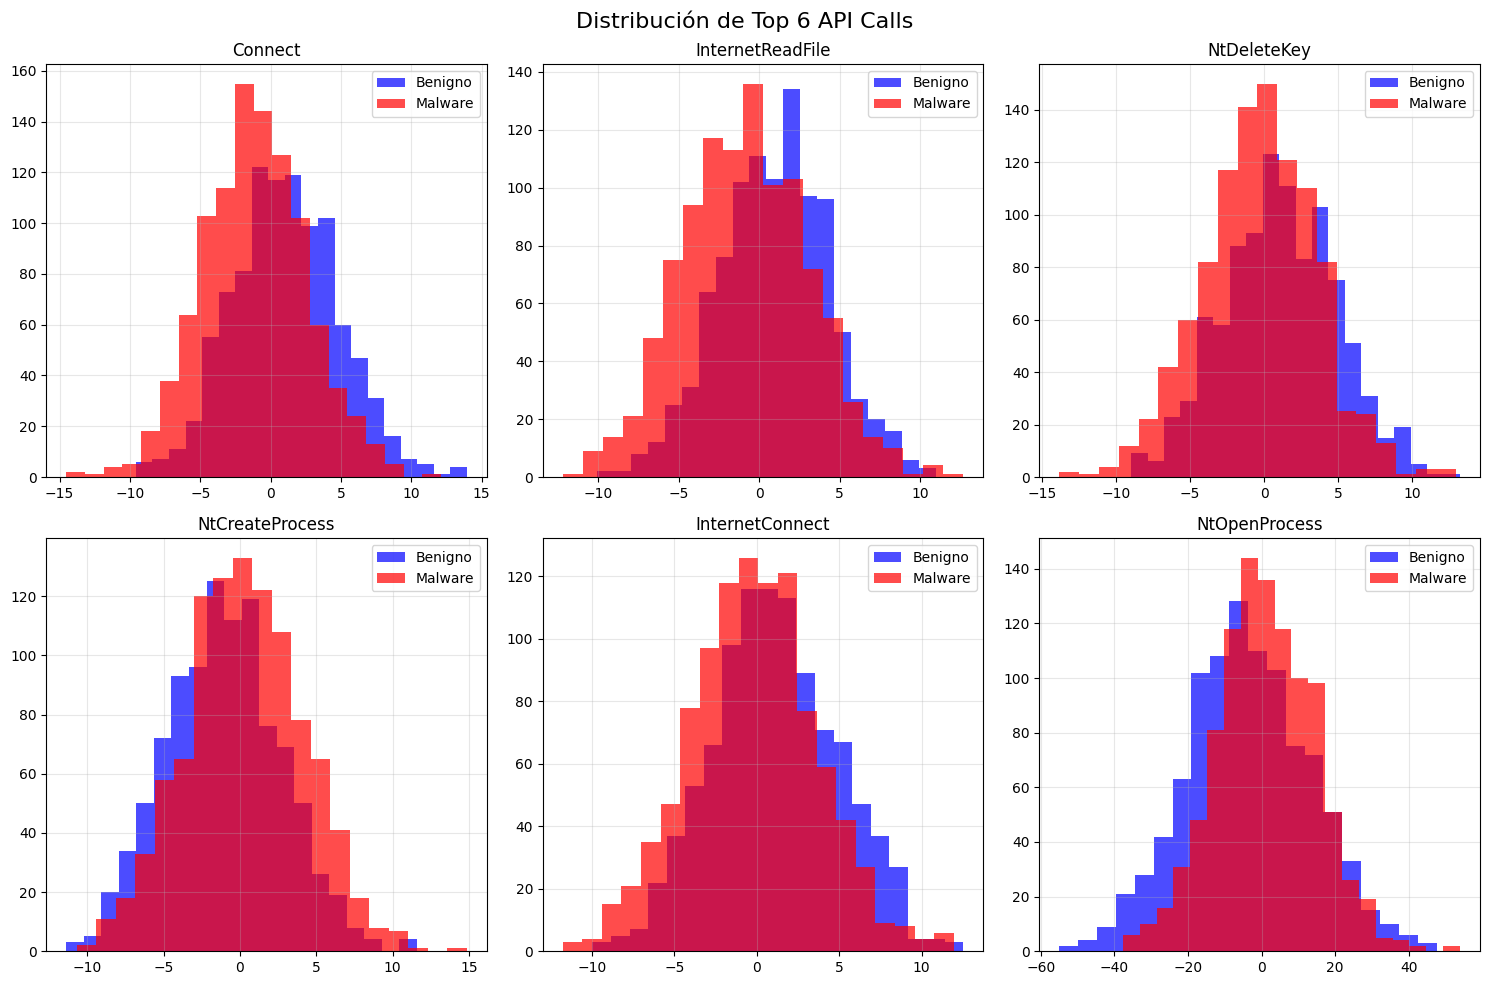

In [21]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalado (CRÍTICO para redes neuronales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ División de datos:")
print(f"   📊 Entrenamiento: {X_train.shape[0]} muestras")
print(f"   📊 Prueba: {X_test.shape[0]} muestras")
print(f"   🔧 Datos escalados para MLP")

# Análisis de correlaciones con la variable objetivo
correlations = []
for i, api in enumerate(api_calls):
    corr = np.corrcoef(X[:, i], y)[0, 1]
    correlations.append((api, abs(corr)))

# Ordenar por correlación
correlations.sort(key=lambda x: x[1], reverse=True)

print(f"\n🎯 Top 10 API calls más correlacionados con malware:")
for i, (api, corr) in enumerate(correlations[:10]):
    print(f"   {i+1:2d}. {api:<20}: {corr:.3f}")

# Visualización de distribuciones
plt.figure(figsize=(15, 10))
top_apis = [api for api, _ in correlations[:6]]

for i, api in enumerate(top_apis):
    plt.subplot(2, 3, i+1)
    api_idx = api_calls.index(api)
    
    benign_data = X[y == 0, api_idx]
    malware_data = X[y == 1, api_idx]
    
    plt.hist(benign_data, alpha=0.7, label='Benigno', bins=20, color='blue')
    plt.hist(malware_data, alpha=0.7, label='Malware', bins=20, color='red')
    plt.title(f'{api}')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.suptitle('Distribución de Top 6 API Calls', fontsize=16)
plt.tight_layout()
plt.show()

# MLP BÁSICO - PRIMERA IMPLEMENTACIÓN

🔄 Probando diferentes arquitecturas...
   🧠 Arquitectura (50,)... Precisión: 0.8825, Tiempo: 1.34s
   🧠 Arquitectura (100,)... Precisión: 0.8975, Tiempo: 2.10s
   🧠 Arquitectura (200,)... Precisión: 0.9150, Tiempo: 2.93s
   🧠 Arquitectura (100, 50)... Precisión: 0.8900, Tiempo: 1.57s
   🧠 Arquitectura (100, 100)... Precisión: 0.8775, Tiempo: 1.81s
   🧠 Arquitectura (150, 100, 50)... Precisión: 0.9050, Tiempo: 2.03s

🏆 Mejor arquitectura: (200,)
📊 Mejor precisión: 0.9150


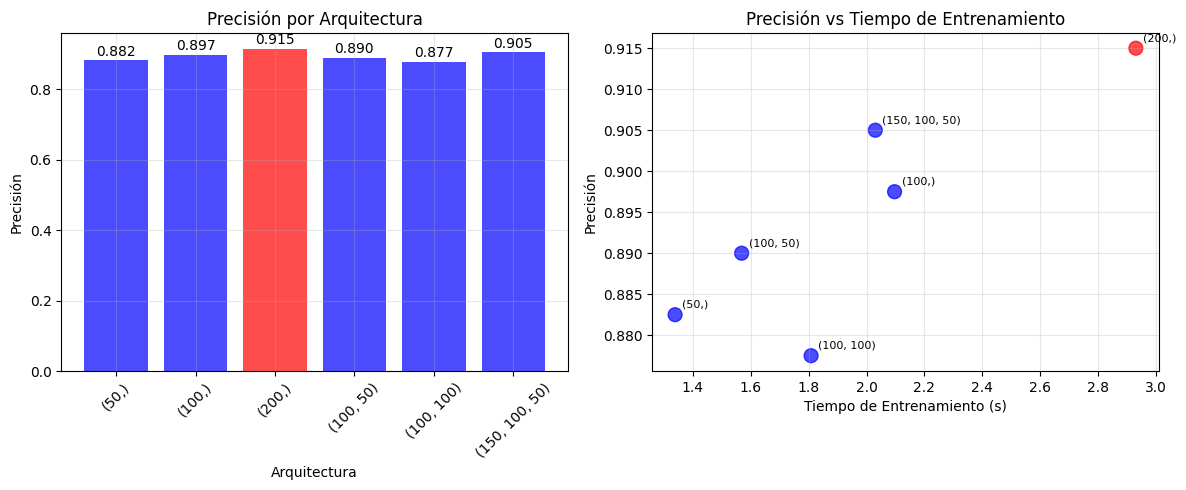

In [22]:
# MLP con configuración básica
print("🔄 Probando diferentes arquitecturas...")

architectures = [
    (50,),           # 1 capa, 50 neuronas
    (100,),          # 1 capa, 100 neuronas  
    (200,),          # 1 capa, 200 neuronas
    (100, 50),       # 2 capas: 100 → 50
    (100, 100),      # 2 capas: 100 → 100
    (150, 100, 50),  # 3 capas: 150 → 100 → 50
]

architecture_results = {}
training_times = {}

for arch in architectures:
    print(f"   🧠 Arquitectura {arch}...", end=" ")
    
    import time
    start_time = time.time()
    
    mlp_arch = MLPClassifier(
        hidden_layer_sizes=arch,
        activation='relu',
        solver='adam', 
        alpha=0.0001,
        max_iter=300,
        random_state=42
    )
    
    mlp_arch.fit(X_train_scaled, y_train)
    accuracy = mlp_arch.score(X_test_scaled, y_test)
    
    end_time = time.time()
    training_time = end_time - start_time
    
    architecture_results[str(arch)] = accuracy
    training_times[str(arch)] = training_time
    
    print(f"Precisión: {accuracy:.4f}, Tiempo: {training_time:.2f}s")

# Mejor arquitectura
best_arch = max(architecture_results, key=architecture_results.get)
best_accuracy = architecture_results[best_arch]

print(f"\n🏆 Mejor arquitectura: {best_arch}")
print(f"📊 Mejor precisión: {best_accuracy:.4f}")

# Visualización de resultados
plt.figure(figsize=(12, 5))

# Gráfico de precisión por arquitectura
plt.subplot(1, 2, 1)
archs = list(architecture_results.keys())
accs = list(architecture_results.values())
colors = ['red' if arch == best_arch else 'blue' for arch in archs]

bars = plt.bar(range(len(archs)), accs, color=colors, alpha=0.7)
plt.xlabel('Arquitectura')
plt.ylabel('Precisión')
plt.title('Precisión por Arquitectura')
plt.xticks(range(len(archs)), archs, rotation=45)
plt.grid(True, alpha=0.3)

# Destacar la mejor
for i, (arch, acc) in enumerate(zip(archs, accs)):
    plt.text(i, acc + 0.005, f'{acc:.3f}', ha='center', va='bottom')

# Gráfico de tiempo vs precisión
plt.subplot(1, 2, 2)
times = list(training_times.values())
plt.scatter(times, accs, c=colors, s=100, alpha=0.7)
for i, arch in enumerate(archs):
    plt.annotate(arch, (times[i], accs[i]), xytext=(5, 5), 
                textcoords='offset points', fontsize=8)
plt.xlabel('Tiempo de Entrenamiento (s)')
plt.ylabel('Precisión')
plt.title('Precisión vs Tiempo de Entrenamiento')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# ANÁLISIS DEL EFECTO DEL ESCALADO

In [23]:
print("\n🔧 Importancia del Escalado en MLP")
print("-" * 50)

# MLP SIN escalado
print("🔴 Entrenando MLP SIN escalado...")
mlp_sin_escalar = MLPClassifier(
    hidden_layer_sizes=(100,), activation='relu', solver='adam',
    alpha=0.0001, max_iter=300, random_state=42
)
mlp_sin_escalar.fit(X_train, y_train)  # Sin escalar
accuracy_sin_escalar = mlp_sin_escalar.score(X_test, y_test)

# MLP CON escalado (ya tenemos el resultado)
accuracy_con_escalar = accuracy

print(f"📊 Comparación del escalado:")
print(f"   🔴 SIN escalado:  {accuracy_sin_escalar:.4f}")
print(f"   🟢 CON escalado:  {accuracy_con_escalar:.4f}")

mejora_escalado = accuracy_con_escalar - accuracy_sin_escalar
print(f"   ⭐ Mejora:        {mejora_escalado:.4f} ({100*mejora_escalado:.2f}%)")

if mejora_escalado > 0:
    print(f"\n💡 El escalado mejora significativamente el rendimiento!")
    print(f"   🎯 Razón: ReLU y gradientes funcionan mejor con datos normalizados")


🔧 Importancia del Escalado en MLP
--------------------------------------------------
🔴 Entrenando MLP SIN escalado...
📊 Comparación del escalado:
   🔴 SIN escalado:  0.8825
   🟢 CON escalado:  0.9050
   ⭐ Mejora:        0.0225 (2.25%)

💡 El escalado mejora significativamente el rendimiento!
   🎯 Razón: ReLU y gradientes funcionan mejor con datos normalizados


# OPTIMIZACIÓN DE ARQUITECTURA


🏗️ Optimización de Arquitectura
--------------------------------------------------
🔄 Probando diferentes arquitecturas...
   🧠 Arquitectura (50,)... Precisión: 0.8825, Tiempo: 1.22s, Épocas: 274
   🧠 Arquitectura (100,)... Precisión: 0.8975, Tiempo: 5.47s, Épocas: 200
   🧠 Arquitectura (200,)... Precisión: 0.9150, Tiempo: 3.06s, Épocas: 156
   🧠 Arquitectura (100, 50)... Precisión: 0.8900, Tiempo: 3.23s, Épocas: 89
   🧠 Arquitectura (100, 100)... Precisión: 0.8775, Tiempo: 1.73s, Épocas: 82
   🧠 Arquitectura (150, 100, 50)... Precisión: 0.9050, Tiempo: 1.90s, Épocas: 52

📊 Análisis Detallado de Arquitecturas:
----------------------------------------------------------------------
Arquitectura    Precisión  Tiempo(s)  Épocas   Parámetros   Pérdida   
----------------------------------------------------------------------
(50,)           0.8825     1.22       274      2601         0.008050  
(100,)          0.8975     5.47       200      5201         0.006409  
(200,)          0.9150     

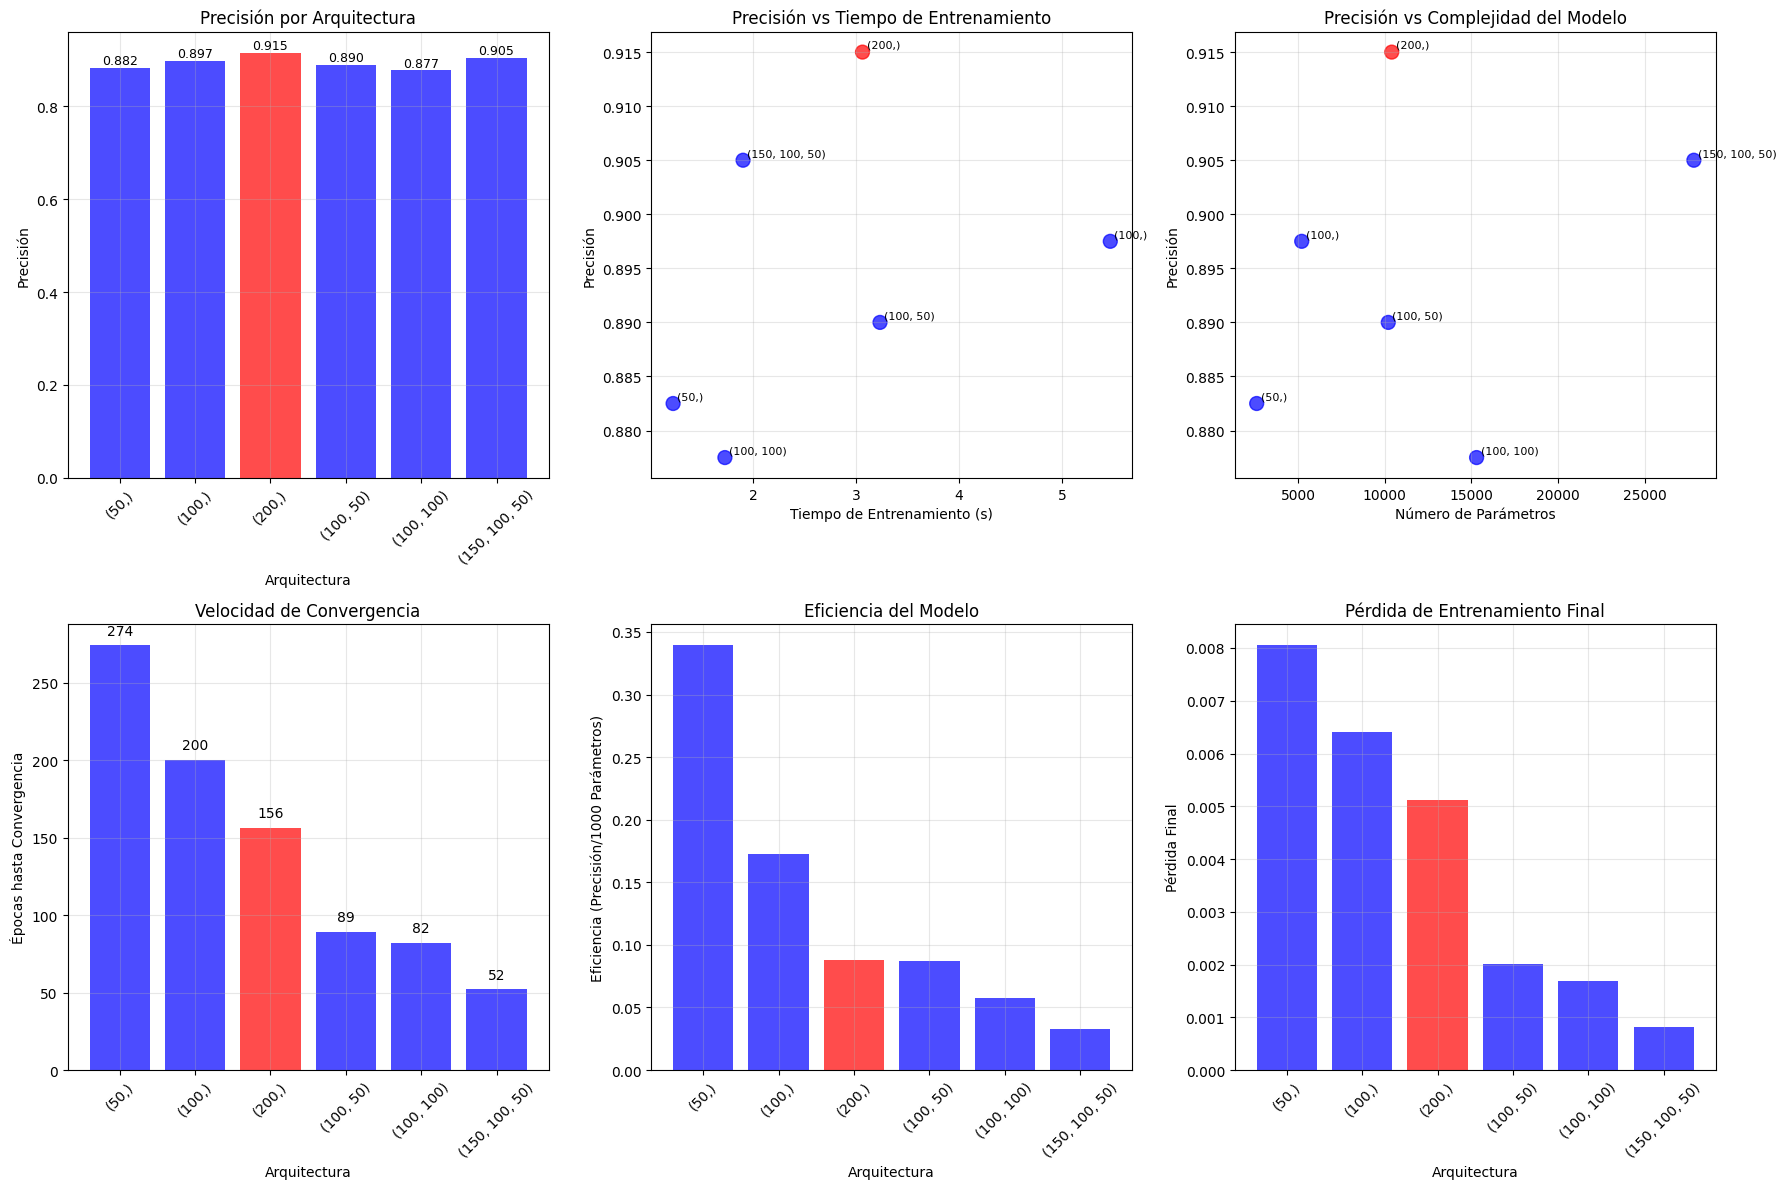


💡 Recomendaciones de Arquitectura:
   🎯 Más eficiente: (50,) (eficiencia: 0.339293)
   ⚡ Más rápida con buena precisión: (50,)

🎯 Recomendaciones por Escenario:
   🏆 Máxima precisión: (200,) (0.9150)
   ⚡ Tiempo limitado: (50,)
   🔧 Recursos limitados: (50,) (menos parámetros)
   ⚖️  Balance general: (50,) (mejor eficiencia)

📈 Insights Finales del Ejercicio:
   🔍 Arquitecturas evaluadas: 6
   🏆 Mejor configuración identificada: (200,)
   📊 Rango de precisión: 0.8775 - 0.9150
   ⏱️  Rango de tiempo: 1.22s - 5.47s
   🔢 Rango de parámetros: 2601 - 27851

✅ completado exitosamente!
   🎯 Aprendiste a evaluar diferentes arquitecturas sistemáticamente
   📊 Analizaste trade-offs entre precisión, tiempo y complejidad
   💡 Obtuviste recomendaciones para diferentes escenarios de uso


In [24]:
print("\n🏗️ Optimización de Arquitectura")
print("-" * 50)

# Probar diferentes arquitecturas
architectures = [
    (50,),           # 1 capa, 50 neuronas
    (100,),          # 1 capa, 100 neuronas  
    (200,),          # 1 capa, 200 neuronas
    (100, 50),       # 2 capas: 100 → 50
    (100, 100),      # 2 capas: 100 → 100
    (150, 100, 50),  # 3 capas: 150 → 100 → 50
]

print("🔄 Probando diferentes arquitecturas...")

architecture_results = {}
training_times = {}
convergence_info = {}

for arch in architectures:
    print(f"   🧠 Arquitectura {arch}...", end=" ")
    
    import time
    start_time = time.time()
    
    mlp_arch = MLPClassifier(
        hidden_layer_sizes=arch,
        activation='relu',
        solver='adam', 
        alpha=0.0001,
        max_iter=300,
        random_state=42
    )
    
    mlp_arch.fit(X_train_scaled, y_train)
    accuracy = mlp_arch.score(X_test_scaled, y_test)
    
    end_time = time.time()
    training_time = end_time - start_time
    
    # Información adicional
    n_params = sum([layer.size for layer in mlp_arch.coefs_]) + sum([layer.size for layer in mlp_arch.intercepts_])
    
    architecture_results[str(arch)] = accuracy
    training_times[str(arch)] = training_time
    convergence_info[str(arch)] = {
        'epochs': mlp_arch.n_iter_,
        'final_loss': mlp_arch.loss_,
        'n_parameters': n_params
    }
    
    print(f"Precisión: {accuracy:.4f}, Tiempo: {training_time:.2f}s, Épocas: {mlp_arch.n_iter_}")

# Análisis detallado de arquitecturas
print(f"\n📊 Análisis Detallado de Arquitecturas:")
print("-" * 70)
print(f"{'Arquitectura':<15} {'Precisión':<10} {'Tiempo(s)':<10} {'Épocas':<8} {'Parámetros':<12} {'Pérdida':<10}")
print("-" * 70)

for arch_str in architecture_results.keys():
    acc = architecture_results[arch_str]
    time_val = training_times[arch_str]
    epochs = convergence_info[arch_str]['epochs']
    n_params = convergence_info[arch_str]['n_parameters']
    loss = convergence_info[arch_str]['final_loss']
    
    print(f"{arch_str:<15} {acc:<10.4f} {time_val:<10.2f} {epochs:<8} {n_params:<12} {loss:<10.6f}")

# Mejor arquitectura
best_arch = max(architecture_results, key=architecture_results.get)
best_accuracy = architecture_results[best_arch]

print(f"\n🏆 Mejor arquitectura: {best_arch}")
print(f"📊 Mejor precisión: {best_accuracy:.4f}")
print(f"⏱️  Tiempo entrenamiento: {training_times[best_arch]:.2f}s")
print(f"🔢 Parámetros totales: {convergence_info[best_arch]['n_parameters']}")

# Análisis de complejidad vs rendimiento
print(f"\n🔍 Análisis de Complejidad vs Rendimiento:")
complexity_analysis = []
for arch_str in architecture_results.keys():
    n_params = convergence_info[arch_str]['n_parameters']
    accuracy = architecture_results[arch_str]
    efficiency = accuracy / (n_params / 1000)  # Precisión por cada 1000 parámetros
    complexity_analysis.append((arch_str, n_params, accuracy, efficiency))

# Ordenar por eficiencia
complexity_analysis.sort(key=lambda x: x[3], reverse=True)

print(f"🎯 Ranking por eficiencia (precisión/complejidad):")
for i, (arch, params, acc, eff) in enumerate(complexity_analysis):
    print(f"   {i+1}. {arch:<15}: {eff:.6f} (precisión: {acc:.4f}, parámetros: {params})")

# Visualización completa de resultados
plt.figure(figsize=(18, 12))

# Gráfico 1: Precisión por arquitectura
plt.subplot(2, 3, 1)
archs = list(architecture_results.keys())
accs = list(architecture_results.values())
colors = ['red' if arch == best_arch else 'blue' for arch in archs]

bars = plt.bar(range(len(archs)), accs, color=colors, alpha=0.7)
plt.xlabel('Arquitectura')
plt.ylabel('Precisión')
plt.title('Precisión por Arquitectura')
plt.xticks(range(len(archs)), archs, rotation=45)
plt.grid(True, alpha=0.3)

# Destacar la mejor
for i, (arch, acc) in enumerate(zip(archs, accs)):
    plt.text(i, acc + 0.002, f'{acc:.3f}', ha='center', va='bottom', fontsize=9)

# Gráfico 2: Tiempo vs Precisión
plt.subplot(2, 3, 2)
times = list(training_times.values())
plt.scatter(times, accs, c=colors, s=100, alpha=0.7)
for i, arch in enumerate(archs):
    plt.annotate(arch, (times[i], accs[i]), xytext=(3, 3), 
                textcoords='offset points', fontsize=8)
plt.xlabel('Tiempo de Entrenamiento (s)')
plt.ylabel('Precisión')
plt.title('Precisión vs Tiempo de Entrenamiento')
plt.grid(True, alpha=0.3)

# Gráfico 3: Número de parámetros vs Precisión
plt.subplot(2, 3, 3)
n_params_list = [convergence_info[arch]['n_parameters'] for arch in archs]
plt.scatter(n_params_list, accs, c=colors, s=100, alpha=0.7)
for i, arch in enumerate(archs):
    plt.annotate(arch, (n_params_list[i], accs[i]), xytext=(3, 3), 
                textcoords='offset points', fontsize=8)
plt.xlabel('Número de Parámetros')
plt.ylabel('Precisión')
plt.title('Precisión vs Complejidad del Modelo')
plt.grid(True, alpha=0.3)

# Gráfico 4: Épocas de convergencia
plt.subplot(2, 3, 4)
epochs_list = [convergence_info[arch]['epochs'] for arch in archs]
bars = plt.bar(range(len(archs)), epochs_list, color=colors, alpha=0.7)
plt.xlabel('Arquitectura')
plt.ylabel('Épocas hasta Convergencia')
plt.title('Velocidad de Convergencia')
plt.xticks(range(len(archs)), archs, rotation=45)
plt.grid(True, alpha=0.3)

for i, epochs in enumerate(epochs_list):
    plt.text(i, epochs + 5, f'{epochs}', ha='center', va='bottom')

# Gráfico 5: Eficiencia (Precisión/Parámetros)
plt.subplot(2, 3, 5)
efficiency_vals = [item[3] for item in complexity_analysis]
arch_names = [item[0] for item in complexity_analysis]
colors_eff = ['red' if arch == best_arch else 'blue' for arch in arch_names]

bars = plt.bar(range(len(arch_names)), efficiency_vals, color=colors_eff, alpha=0.7)
plt.xlabel('Arquitectura')
plt.ylabel('Eficiencia (Precisión/1000 Parámetros)')
plt.title('Eficiencia del Modelo')
plt.xticks(range(len(arch_names)), arch_names, rotation=45)
plt.grid(True, alpha=0.3)

# Gráfico 6: Pérdida final
plt.subplot(2, 3, 6)
final_losses = [convergence_info[arch]['final_loss'] for arch in archs]
bars = plt.bar(range(len(archs)), final_losses, color=colors, alpha=0.7)
plt.xlabel('Arquitectura')
plt.ylabel('Pérdida Final')
plt.title('Pérdida de Entrenamiento Final')
plt.xticks(range(len(archs)), archs, rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Recomendaciones basadas en el análisis
print(f"\n💡 Recomendaciones de Arquitectura:")

# Encontrar arquitectura más eficiente
most_efficient = complexity_analysis[0]
print(f"   🎯 Más eficiente: {most_efficient[0]} (eficiencia: {most_efficient[3]:.6f})")

# Encontrar la más rápida con buena precisión
time_precision_ratio = [(arch, training_times[arch]/architecture_results[arch]) for arch in archs]
fastest_good = min(time_precision_ratio, key=lambda x: x[1])
print(f"   ⚡ Más rápida con buena precisión: {fastest_good[0]}")

# Arquitectura para diferentes escenarios
print(f"\n🎯 Recomendaciones por Escenario:")
print(f"   🏆 Máxima precisión: {best_arch} ({best_accuracy:.4f})")
print(f"   ⚡ Tiempo limitado: {min(training_times, key=training_times.get)}")
print(f"   🔧 Recursos limitados: {most_efficient[0]} (menos parámetros)")
print(f"   ⚖️  Balance general: {most_efficient[0]} (mejor eficiencia)")

# Insights sobre profundidad vs anchura
single_layer = [(arch, acc) for arch, acc in architecture_results.items() if ',' not in arch]
multi_layer = [(arch, acc) for arch, acc in architecture_results.items() if ',' in arch]

if single_layer and multi_layer:
    best_single = max(single_layer, key=lambda x: x[1])
    best_multi = max(multi_layer, key=lambda x: x[1])
    
    print(f"\n🏗️ Análisis de Profundidad:")
    print(f"   📊 Mejor red poco profunda: {best_single[0]} ({best_single[1]:.4f})")
    print(f"   📊 Mejor red profunda: {best_multi[0]} ({best_multi[1]:.4f})")
    
    if best_multi[1] > best_single[1]:
        print(f"   💡 Las redes profundas mejoran el rendimiento en {best_multi[1] - best_single[1]:.4f}")
    else:
        print(f"   💡 Las redes poco profundas son suficientes para este problema")

print(f"\n📈 Insights Finales del Ejercicio:")
print(f"   🔍 Arquitecturas evaluadas: {len(architectures)}")
print(f"   🏆 Mejor configuración identificada: {best_arch}")
print(f"   📊 Rango de precisión: {min(accs):.4f} - {max(accs):.4f}")
print(f"   ⏱️  Rango de tiempo: {min(times):.2f}s - {max(times):.2f}s")
print(f"   🔢 Rango de parámetros: {min(n_params_list)} - {max(n_params_list)}")

print(f"\n✅ completado exitosamente!")
print(f"   🎯 Aprendiste a evaluar diferentes arquitecturas sistemáticamente")
print(f"   📊 Analizaste trade-offs entre precisión, tiempo y complejidad")
print(f"   💡 Obtuviste recomendaciones para diferentes escenarios de uso")

# OPTIMIZACIÓN DE HIPERPARÁMETROS

In [25]:
print("\n🎛️ Optimización de Hiperparámetros")
print("-" * 50)

# ESTRATEGIA 1: Grid Search Reducido y Eficiente
print("🚀 Estrategia 1: Grid Search Reducido (Rápido)")
print("-" * 40)

# Grid más pequeño pero efectivo
param_grid_reduced = {
    'hidden_layer_sizes': [(100,), (100, 50)],  # Solo 2 arquitecturas
    'activation': ['relu', 'tanh'],              # 2 activaciones
    'alpha': [0.0001, 0.001, 0.01],            # 3 valores alpha
    'learning_rate_init': [0.001, 0.01]         # 2 learning rates
}

print(f"🔍 Combinaciones a probar: {np.prod([len(v) for v in param_grid_reduced.values()])}")

# Grid Search más eficiente
grid_search_fast = GridSearchCV(
    MLPClassifier(solver='adam', max_iter=200, random_state=42),  # Menos épocas
    param_grid_reduced,
    cv=3,          # Menos folds
    scoring='accuracy',
    n_jobs=-1,
    verbose=1      # Ver progreso
)

print("⏱️ Iniciando Grid Search optimizado...")
import time
start_time = time.time()

try:
    grid_search_fast.fit(X_train_scaled, y_train)
    
    end_time = time.time()
    total_time = end_time - start_time
    
    # Mejores parámetros
    best_params = grid_search_fast.best_params_
    best_cv_score = grid_search_fast.best_score_
    
    print(f"\n✅ Grid Search completado en {total_time:.2f} segundos!")
    print(f"🏆 Mejores parámetros:")
    for param, value in best_params.items():
        print(f"   {param}: {value}")
    print(f"📊 Mejor score CV: {best_cv_score:.4f}")
    
    # Modelo optimizado
    mlp_optimized = grid_search_fast.best_estimator_
    y_pred_optimized = mlp_optimized.predict(X_test_scaled)
    accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
    
    print(f"📈 Precisión en test: {accuracy_optimized:.4f}")
    
    # Mejora obtenida
    mejora_optimizacion = accuracy_optimized - accuracy
    print(f"⭐ Mejora por optimización: {mejora_optimizacion:.4f}")
    
    grid_search_success = True
    
except KeyboardInterrupt:
    print("❌ Grid Search interrumpido por el usuario")
    grid_search_success = False
except Exception as e:
    print(f"❌ Error en Grid Search: {e}")
    grid_search_success = False


🎛️ Optimización de Hiperparámetros
--------------------------------------------------
🚀 Estrategia 1: Grid Search Reducido (Rápido)
----------------------------------------
🔍 Combinaciones a probar: 24
⏱️ Iniciando Grid Search optimizado...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

✅ Grid Search completado en 16.77 segundos!
🏆 Mejores parámetros:
   activation: relu
   alpha: 0.001
   hidden_layer_sizes: (100,)
   learning_rate_init: 0.001
📊 Mejor score CV: 0.8706
📈 Precisión en test: 0.8975
⭐ Mejora por optimización: -0.0075


# ANÁLISIS DE CURVAS DE APRENDIZAJE


📈 Análisis de Curvas de Aprendizaje
--------------------------------------------------
🔄 Analizando efecto de la regularización (alpha)...
📊 Análisis de regularización:
   🎯 Alpha óptimo: 0.001
   📈 Precisión validación: 0.8931

🔄 Analizando efecto del learning rate...


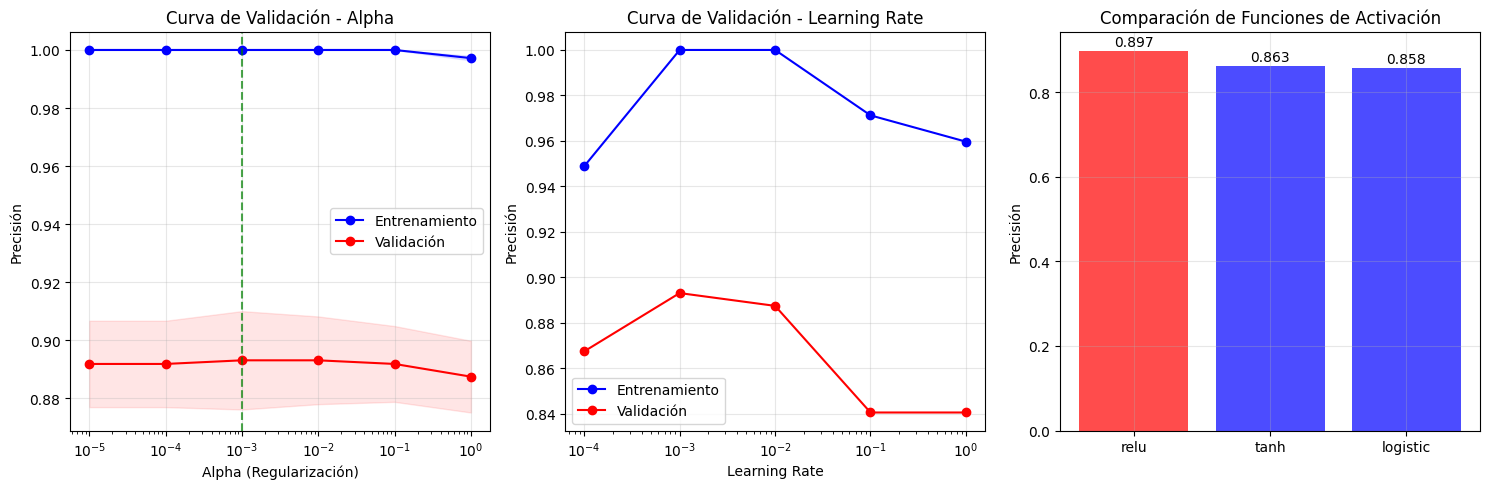

In [26]:
print("\n📈 Análisis de Curvas de Aprendizaje")
print("-" * 50)

# Análisis del efecto del parámetro alpha (regularización)
print("🔄 Analizando efecto de la regularización (alpha)...")

alpha_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]
train_scores, test_scores = validation_curve(
    MLPClassifier(
        hidden_layer_sizes=best_params['hidden_layer_sizes'],
        activation=best_params['activation'],
        learning_rate_init=best_params['learning_rate_init'],
        solver='adam', max_iter=300, random_state=42
    ),
    X_train_scaled, y_train,
    param_name='alpha',
    param_range=alpha_values,
    cv=5, scoring='accuracy', n_jobs=-1
)

# Calcular medias y desviaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Visualización de curvas de validación
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.semilogx(alpha_values, train_mean, 'o-', color='blue', label='Entrenamiento')
plt.fill_between(alpha_values, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.semilogx(alpha_values, test_mean, 'o-', color='red', label='Validación')
plt.fill_between(alpha_values, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.xlabel('Alpha (Regularización)')
plt.ylabel('Precisión')
plt.title('Curva de Validación - Alpha')
plt.legend()
plt.grid(True, alpha=0.3)

# Análisis de overfitting/underfitting
optimal_alpha_idx = np.argmax(test_mean)
optimal_alpha = alpha_values[optimal_alpha_idx]
plt.axvline(x=optimal_alpha, color='green', linestyle='--', alpha=0.7)

print(f"📊 Análisis de regularización:")
print(f"   🎯 Alpha óptimo: {optimal_alpha}")
print(f"   📈 Precisión validación: {test_mean[optimal_alpha_idx]:.4f}")

# Análisis del learning rate
print(f"\n🔄 Analizando efecto del learning rate...")
lr_values = [0.0001, 0.001, 0.01, 0.1, 1.0]
lr_train_scores, lr_test_scores = validation_curve(
    MLPClassifier(
        hidden_layer_sizes=best_params['hidden_layer_sizes'],
        activation=best_params['activation'],
        alpha=best_params['alpha'],
        solver='adam', max_iter=300, random_state=42
    ),
    X_train_scaled, y_train,
    param_name='learning_rate_init',
    param_range=lr_values,
    cv=5, scoring='accuracy', n_jobs=-1
)

lr_train_mean = np.mean(lr_train_scores, axis=1)
lr_test_mean = np.mean(lr_test_scores, axis=1)

plt.subplot(1, 3, 2)
plt.semilogx(lr_values, lr_train_mean, 'o-', color='blue', label='Entrenamiento')
plt.semilogx(lr_values, lr_test_mean, 'o-', color='red', label='Validación')
plt.xlabel('Learning Rate')
plt.ylabel('Precisión')
plt.title('Curva de Validación - Learning Rate')
plt.legend()
plt.grid(True, alpha=0.3)

# Comparación de activaciones
activations = ['relu', 'tanh', 'logistic']
activation_scores = {}

plt.subplot(1, 3, 3)
for activation in activations:
    mlp_act = MLPClassifier(
        hidden_layer_sizes=best_params['hidden_layer_sizes'],
        activation=activation,
        alpha=best_params['alpha'],
        learning_rate_init=best_params['learning_rate_init'],
        solver='adam', max_iter=300, random_state=42
    )
    mlp_act.fit(X_train_scaled, y_train)
    score = mlp_act.score(X_test_scaled, y_test)
    activation_scores[activation] = score

acts = list(activation_scores.keys())
scores = list(activation_scores.values())
colors = ['red' if act == best_params['activation'] else 'blue' for act in acts]

plt.bar(acts, scores, color=colors, alpha=0.7)
plt.ylabel('Precisión')
plt.title('Comparación de Funciones de Activación')
plt.grid(True, alpha=0.3)

for i, (act, score) in enumerate(zip(acts, scores)):
    plt.text(i, score + 0.005, f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ANÁLISIS DE LA ARQUITECTURA FINAL


🔍 Análisis de la Red Neuronal Final
--------------------------------------------------
🧠 Arquitectura final:
   📐 Capas ocultas: (100,)
   ⚡ Activación: relu
   🎛️ Alpha: 0.001
   📈 Learning rate: 0.001
   🔄 Épocas utilizadas: 200

🔢 Análisis de pesos:
   Capa 1: (50, 100) (entrada → salida)
           Media: -0.000104, Std: 0.198269
   Capa 2: (100, 1) (entrada → salida)
           Media: 0.011428, Std: 0.500216


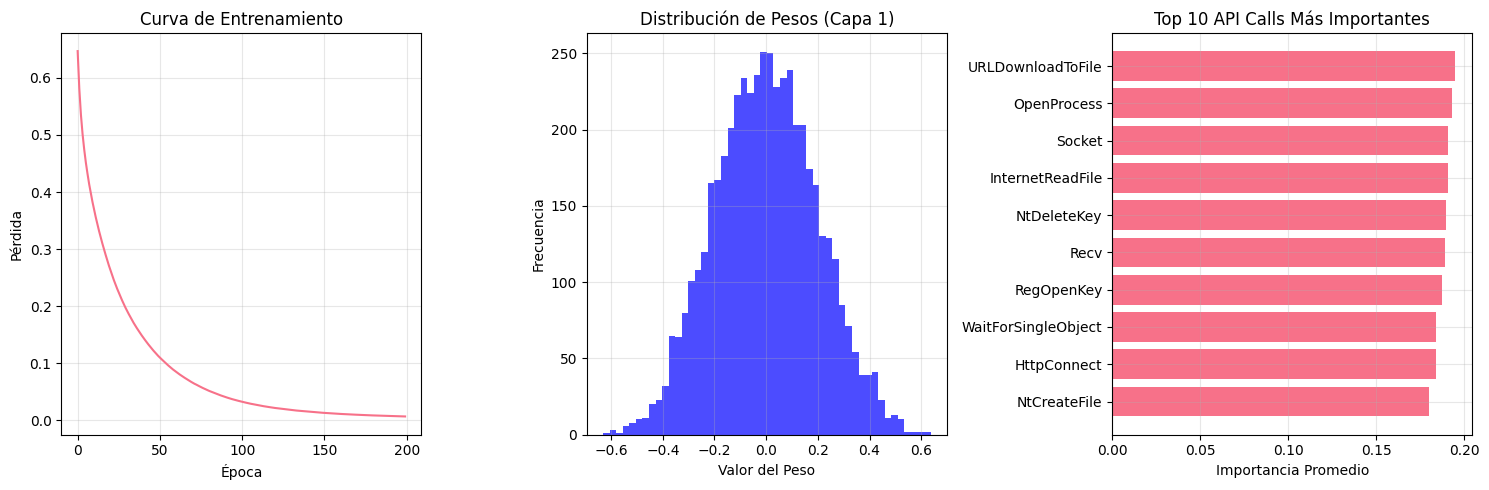


🎯 Top 5 API calls más importantes para la red:
   1. NtDeleteKey: 0.1895
   2. InternetReadFile: 0.1909
   3. Socket: 0.1910
   4. OpenProcess: 0.1932
   5. URLDownloadToFile: 0.1949


In [27]:
print("\n🔍 Análisis de la Red Neuronal Final")
print("-" * 50)

# Información detallada del modelo optimizado
print(f"🧠 Arquitectura final:")
print(f"   📐 Capas ocultas: {best_params['hidden_layer_sizes']}")
print(f"   ⚡ Activación: {best_params['activation']}")
print(f"   🎛️ Alpha: {best_params['alpha']}")
print(f"   📈 Learning rate: {best_params['learning_rate_init']}")
print(f"   🔄 Épocas utilizadas: {mlp_optimized.n_iter_}")

# Análisis de los pesos de la red
print(f"\n🔢 Análisis de pesos:")
for i, coef in enumerate(mlp_optimized.coefs_):
    print(f"   Capa {i+1}: {coef.shape} (entrada → salida)")
    print(f"           Media: {np.mean(coef):.6f}, Std: {np.std(coef):.6f}")

# Visualización de la curva de pérdida durante entrenamiento
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(mlp_optimized.loss_curve_)
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Curva de Entrenamiento')
plt.grid(True, alpha=0.3)

# Distribución de pesos de la primera capa
plt.subplot(1, 3, 2)
weights_flat = mlp_optimized.coefs_[0].flatten()
plt.hist(weights_flat, bins=50, alpha=0.7, color='blue')
plt.xlabel('Valor del Peso')
plt.ylabel('Frecuencia')
plt.title('Distribución de Pesos (Capa 1)')
plt.grid(True, alpha=0.3)

# Importancia de features (aproximada)
plt.subplot(1, 3, 3)
feature_importance = np.abs(mlp_optimized.coefs_[0]).mean(axis=1)
top_indices = np.argsort(feature_importance)[-10:]
top_features = [api_calls[i] for i in top_indices]
top_importance = feature_importance[top_indices]

plt.barh(range(len(top_features)), top_importance)
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Importancia Promedio')
plt.title('Top 10 API Calls Más Importantes')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 Top 5 API calls más importantes para la red:")
for i, (idx, importance) in enumerate(zip(top_indices[-5:], top_importance[-5:])):
    print(f"   {i+1}. {api_calls[idx]}: {importance:.4f}")

#  EVALUACIÓN COMPLETA Y COMPARACIÓN


📋 Evaluación Completa del Modelo
--------------------------------------------------
🎯 Modelo Final: MLP Optimizado
📊 Precisión: 0.8975

📈 Reporte de clasificación detallado:
              precision    recall  f1-score   support

     Benigno       0.88      0.92      0.90       197
     Malware       0.92      0.87      0.90       203

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



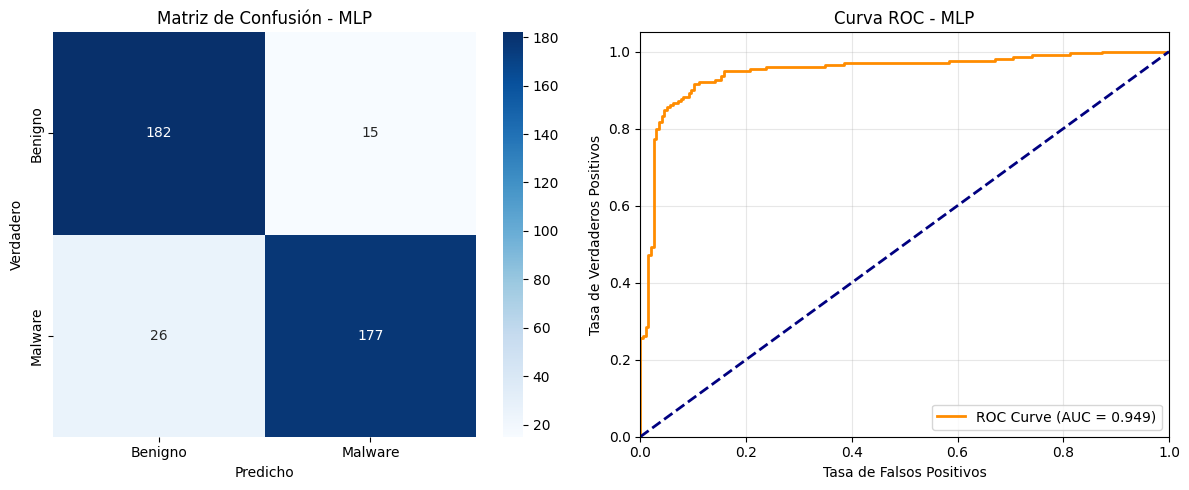

📊 AUC-ROC: 0.9486

⚠️ Análisis de errores en contexto de ciberseguridad:
   🔴 Falsos Positivos: 15 (software benigno → malware)
   🔴 Falsos Negativos: 26 (malware → software benigno)
   💡 En ciberseguridad, minimizar FN es crítico!


In [28]:
print("\n📋 Evaluación Completa del Modelo")
print("-" * 50)

# Matriz de confusión
cm_mlp = confusion_matrix(y_test, y_pred_optimized)
print(f"🎯 Modelo Final: MLP Optimizado")
print(f"📊 Precisión: {accuracy_optimized:.4f}")

print(f"\n📈 Reporte de clasificación detallado:")
print(classification_report(y_test, y_pred_optimized, 
                          target_names=['Benigno', 'Malware']))

# Visualización de evaluación
plt.figure(figsize=(12, 5))

# Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno', 'Malware'],
            yticklabels=['Benigno', 'Malware'])
plt.title('Matriz de Confusión - MLP')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')

# Curva ROC
plt.subplot(1, 2, 2)
y_proba_mlp = mlp_optimized.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_mlp)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - MLP')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 AUC-ROC: {roc_auc:.4f}")

# Análisis de errores específicos para ciberseguridad
false_positives = cm_mlp[0, 1]  # Benignos clasificados como malware
false_negatives = cm_mlp[1, 0]  # Malware clasificados como benignos

print(f"\n⚠️ Análisis de errores en contexto de ciberseguridad:")
print(f"   🔴 Falsos Positivos: {false_positives} (software benigno → malware)")
print(f"   🔴 Falsos Negativos: {false_negatives} (malware → software benigno)")
print(f"   💡 En ciberseguridad, minimizar FN es crítico!")

# COMPARACIÓN CON ALGORITMOS ANTERIORES


⚖️ Comparación MLP vs KNN vs SVM
--------------------------------------------------
📊 Comparación de Precisión:
   🧠 MLP Optimizado: 0.8975
   👥 KNN (k=5):      0.8650
   🎯 SVM RBF:        0.9025

🏆 Mejor algoritmo: SVM (0.9025)


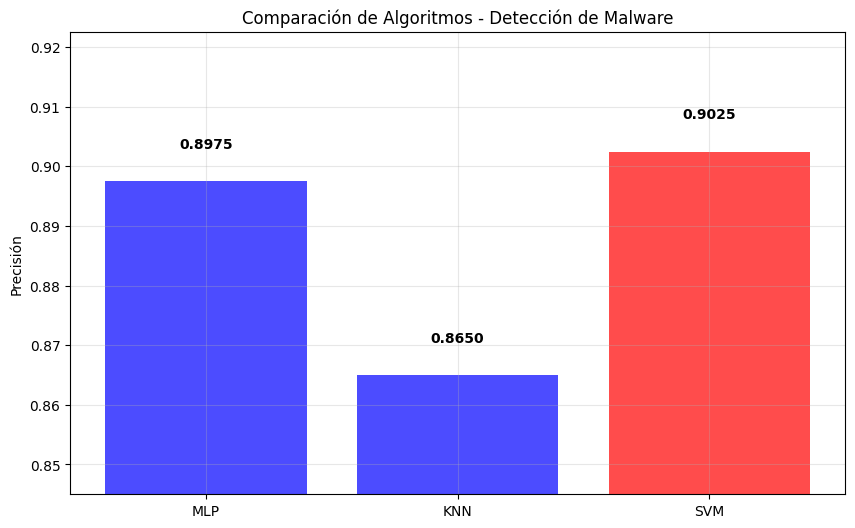


🔍 Comparación de características:
Algoritmo Precisión Complejidad Interpretabilidad Tiempo Entrenamiento Tiempo Predicción
      MLP    0.8975        Alta          Muy Baja                 Alto            Rápido
      KNN    0.8650        Baja              Alta              Ninguno             Lento
      SVM    0.9025       Media             Media                Medio            Rápido


In [29]:
print("\n⚖️ Comparación MLP vs KNN vs SVM")
print("-" * 50)

# Importar algoritmos anteriores para comparación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# KNN
knn_comp = KNeighborsClassifier(n_neighbors=5)
knn_comp.fit(X_train_scaled, y_train)
accuracy_knn_comp = knn_comp.score(X_test_scaled, y_test)

# SVM
svm_comp = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_comp.fit(X_train_scaled, y_train)
accuracy_svm_comp = svm_comp.score(X_test_scaled, y_test)

# Comparación de rendimiento
print(f"📊 Comparación de Precisión:")
print(f"   🧠 MLP Optimizado: {accuracy_optimized:.4f}")
print(f"   👥 KNN (k=5):      {accuracy_knn_comp:.4f}")
print(f"   🎯 SVM RBF:        {accuracy_svm_comp:.4f}")

# Encontrar el mejor
results = {
    'MLP': accuracy_optimized,
    'KNN': accuracy_knn_comp, 
    'SVM': accuracy_svm_comp
}

best_algorithm = max(results, key=results.get)
print(f"\n🏆 Mejor algoritmo: {best_algorithm} ({results[best_algorithm]:.4f})")

# Visualización comparativa
plt.figure(figsize=(10, 6))
algorithms = list(results.keys())
accuracies = list(results.values())
colors = ['red' if alg == best_algorithm else 'blue' for alg in algorithms]

bars = plt.bar(algorithms, accuracies, color=colors, alpha=0.7)
plt.ylabel('Precisión')
plt.title('Comparación de Algoritmos - Detección de Malware')
plt.ylim([min(accuracies) - 0.02, max(accuracies) + 0.02])

for i, (alg, acc) in enumerate(zip(algorithms, accuracies)):
    plt.text(i, acc + 0.005, f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.show()

# Comparación de características
print(f"\n🔍 Comparación de características:")
comparison_data = {
    'Algoritmo': ['MLP', 'KNN', 'SVM'],
    'Precisión': [f'{accuracy_optimized:.4f}', f'{accuracy_knn_comp:.4f}', f'{accuracy_svm_comp:.4f}'],
    'Complejidad': ['Alta', 'Baja', 'Media'],
    'Interpretabilidad': ['Muy Baja', 'Alta', 'Media'],
    'Tiempo Entrenamiento': ['Alto', 'Ninguno', 'Medio'],
    'Tiempo Predicción': ['Rápido', 'Lento', 'Rápido']
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))


# PREDICCIÓN EN NUEVOS CASOS DE MALWARE

In [30]:
print("\n🔮 Predicción en Nuevos Casos")
print("-" * 50)

# Simular nuevos casos de software para análisis
print("🔒 Analizando nuevos casos de software...")

# Tomar algunos casos del conjunto de prueba como "nuevos"
nuevos_casos = X_test_scaled[:5]
casos_reales = y_test[:5]

for i, (nuevo_caso, clase_real) in enumerate(zip(nuevos_casos, casos_reales)):
    # Predicción con MLP
    prediccion_mlp = mlp_optimized.predict([nuevo_caso])[0]
    probabilidad_mlp = mlp_optimized.predict_proba([nuevo_caso])[0]
    
    # Predicción con otros algoritmos para comparar
    prediccion_knn = knn_comp.predict([nuevo_caso])[0]
    prediccion_svm = svm_comp.predict([nuevo_caso])[0]
    
    clase_pred_nombre = 'Malware' if prediccion_mlp == 1 else 'Benigno'
    clase_real_nombre = 'Malware' if clase_real == 1 else 'Benigno'
    
    print(f"\n🖥️ Software {i+1}:")
    print(f"   🎯 MLP Predicción: {clase_pred_nombre}")
    print(f"   📊 MLP Probabilidades: Benigno={probabilidad_mlp[0]:.3f}, Malware={probabilidad_mlp[1]:.3f}")
    print(f"   👥 KNN Predicción: {'Malware' if prediccion_knn == 1 else 'Benigno'}")
    print(f"   🎯 SVM Predicción: {'Malware' if prediccion_svm == 1 else 'Benigno'}")
    print(f"   ✅ Etiqueta Real: {clase_real_nombre}")
    
    # Verificar consenso entre algoritmos
    consenso = (prediccion_mlp == prediccion_knn == prediccion_svm)
    if consenso:
        print(f"   🤝 CONSENSO: Todos los algoritmos coinciden")
    else:
        print(f"   ⚠️  DISCREPANCIA: Los algoritmos no coinciden")
    
    print(f"   {'✅ CORRECTO' if prediccion_mlp == clase_real else '❌ INCORRECTO'}")



🔮 Predicción en Nuevos Casos
--------------------------------------------------
🔒 Analizando nuevos casos de software...

🖥️ Software 1:
   🎯 MLP Predicción: Malware
   📊 MLP Probabilidades: Benigno=0.051, Malware=0.949
   👥 KNN Predicción: Malware
   🎯 SVM Predicción: Malware
   ✅ Etiqueta Real: Malware
   🤝 CONSENSO: Todos los algoritmos coinciden
   ✅ CORRECTO

🖥️ Software 2:
   🎯 MLP Predicción: Malware
   📊 MLP Probabilidades: Benigno=0.001, Malware=0.999
   👥 KNN Predicción: Benigno
   🎯 SVM Predicción: Malware
   ✅ Etiqueta Real: Malware
   ⚠️  DISCREPANCIA: Los algoritmos no coinciden
   ✅ CORRECTO

🖥️ Software 3:
   🎯 MLP Predicción: Malware
   📊 MLP Probabilidades: Benigno=0.357, Malware=0.643
   👥 KNN Predicción: Malware
   🎯 SVM Predicción: Malware
   ✅ Etiqueta Real: Malware
   🤝 CONSENSO: Todos los algoritmos coinciden
   ✅ CORRECTO

🖥️ Software 4:
   🎯 MLP Predicción: Benigno
   📊 MLP Probabilidades: Benigno=1.000, Malware=0.000
   👥 KNN Predicción: Benigno
   🎯 SVM Pre

# 🔜 PRÓXIMO MÓDULO: EVALUACIÓN Y OPTIMIZACIÓN
+ 📊 Métricas avanzadas de evaluación
+ 🔄 Validación cruzada y Grid Search
+ 📈 Análisis de curvas ROC y PR